In [29]:
from hiive.mdptoolbox import example, mdp

# Transition (P)robability matrix and (R)eward matrix
# S: states, r1: Wait reward, r2: Cut reward, p: wildfire occurrence probability
forest_P, forest_R = example.forest(S=50, r1=4, r2=2, p=0.1, is_sparse=False)

Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

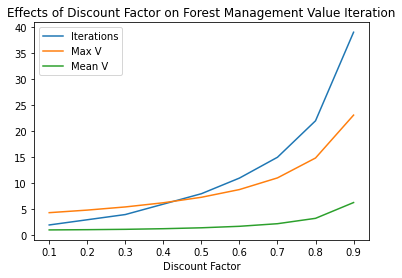

Converged in 39 iterations.
Running time: 0.0012845993041992188


In [5]:
# P: Transition probability matrices
# R: Reward matrices or vectors
# gamma: The per time-step discount factor on future rewards (0-1)
# epsilon: Stopping criterion below which change in the value function may fall (value function considered to have converged to optimal). Default 0.01.
forest_gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
forest_gamma_iterations = []
forest_gamma_max_vs = []
forest_gamma_mean_vs = []
for g in forest_gammas:
    forest_gamma_vi = mdp.ValueIteration(forest_P, forest_R, gamma=g)
    forest_gamma_vi.run()
    # Get last values for iteration, mean V and max V
    final = forest_gamma_vi.run_stats[-1]
    forest_gamma_iterations.append(final["Iteration"])
    forest_gamma_max_vs.append(final["Max V"])
    forest_gamma_mean_vs.append(final["Mean V"])
    print(f"Optimal policy is: {forest_gamma_vi.policy}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(forest_gammas, forest_gamma_iterations, label="Iterations")
plt.plot(forest_gammas, forest_gamma_max_vs, label="Max V")
plt.plot(forest_gammas, forest_gamma_mean_vs, label="Mean V")
plt.title(f"Effects of Discount Factor on Forest Management Value Iteration")
plt.xlabel("Discount Factor")
plt.xticks(forest_gammas)
plt.legend(loc="best")
filename = f"forest_value_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

# How many iterations does it take to converge?
print(f"Converged in {forest_gamma_vi.iter} iterations.")
# CPU time to run
print(f"Running time: {forest_gamma_vi.time}")
# print(forest_gamma_vi.run_stats)

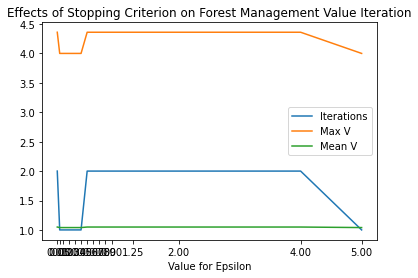

Converged in 1 iterations.
Running time: 4.172325134277344e-05


In [27]:
forest_epsilon_epsilons = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.25, 2, 4, 5]
forest_epsilon_iterations = []
forest_epsilon_max_vs = []
forest_epsilon_mean_vs = []
for e in forest_epsilon_epsilons:
    forest_epsilon_vi = mdp.ValueIteration(forest_P, forest_R, gamma=0.1, epsilon=e)
    forest_epsilon_vi.run()
    # Get last values for iteration, mean V and max V
    final = forest_epsilon_vi.run_stats[-1]
    forest_epsilon_iterations.append(final["Iteration"])
    forest_epsilon_max_vs.append(final["Max V"])
    forest_epsilon_mean_vs.append(final["Mean V"])
    # print(f"Optimal policy is: {forest_epsilon_vi.policy}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(forest_epsilon_epsilons, forest_epsilon_iterations, label="Iterations")
plt.plot(forest_epsilon_epsilons, forest_epsilon_max_vs, label="Max V")
plt.plot(forest_epsilon_epsilons, forest_epsilon_mean_vs, label="Mean V")
plt.title(f"Effects of Stopping Criterion on Forest Management Value Iteration")
plt.xlabel("Value for Epsilon")
plt.xticks(forest_epsilon_epsilons)
plt.legend(loc="best")
filename = f"forest_epsilon_value_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

# How many iterations does it take to converge?
print(f"Converged in {forest_epsilon_vi.iter} iterations.")
# CPU time to run
print(f"Running time: {forest_epsilon_vi.time}")
# print(forest_epsilon_vi.run_stats)

{'State': None, 'Action': None, 'Reward': 23.089675091923866, 'Error': 0.009818017806856538, 'Time': 0.0014107227325439453, 'Max V': 23.089675091923866, 'Mean V': 6.302927426365121, 'Iteration': 39}
39
39
39
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
10
10
10
(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
{'State': None, 'Action': None, 'Reward': 23.17234211944304, 'Error': 9.173372840010074e-06, 'Time': 0.006892204284667969, 'V[0]': 4.475046400744577, 'Max V': 23.17234211944304, 'Mean V': 6.38156298813899, 'Iteration': 10}


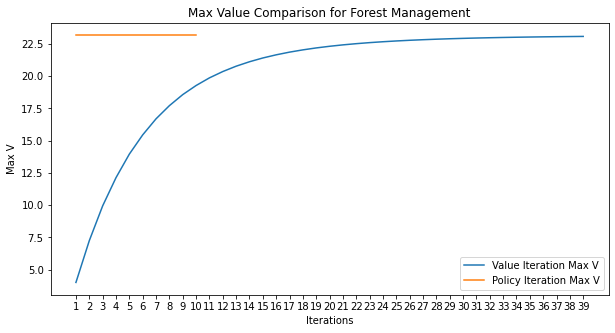

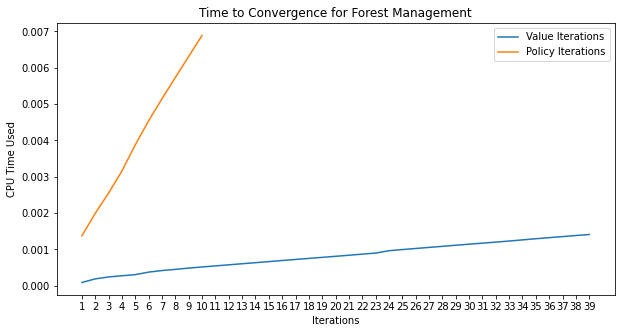

In [39]:
# TODO compare to PI
forest_perf_vi = mdp.ValueIteration(forest_P, forest_R, gamma=0.9)
forest_perf_vi.run()
print(forest_perf_vi.run_stats[-1])

forest_perf_iterations = [i["Iteration"] for i in forest_perf_vi.run_stats]
forest_perf_max_vs = [i["Max V"] for i in forest_perf_vi.run_stats]
forest_perf_time = [i["Time"] for i in forest_perf_vi.run_stats]

print(len(forest_perf_iterations))
print(len(forest_perf_max_vs))
print(len(forest_perf_time))
print(forest_perf_vi.policy)

forest_perf_pi = mdp.PolicyIteration(forest_P, forest_R, gamma=g, eval_type=1)
forest_perf_pi.run()

forest_perf_pi_iterations = [i["Iteration"] for i in forest_perf_pi.run_stats]
forest_perf_pi_max_vs = [i["Max V"] for i in forest_perf_pi.run_stats]
forest_perf_pi_time = [i["Time"] for i in forest_perf_pi.run_stats]

print(len(forest_perf_pi_iterations))
print(len(forest_perf_pi_max_vs))
print(len(forest_perf_pi_time))
print(forest_perf_pi.policy)
print(forest_perf_pi.run_stats[-1])

plt.figure(figsize=(10,5))
plt.plot(forest_perf_iterations, forest_perf_max_vs, label="Value Iteration Max V")
plt.plot(forest_perf_pi_iterations, forest_perf_pi_max_vs, label="Policy Iteration Max V")
plt.title(f"Max Value Comparison for Forest Management")
plt.xlabel("Iterations")
plt.ylabel("Max V")
plt.xticks(forest_perf_iterations)
plt.legend(loc="best")
filename = f"forest_perf_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(forest_perf_iterations, forest_perf_time, label="Value Iterations")
plt.plot(forest_perf_pi_iterations, forest_perf_pi_time, label="Policy Iterations")
plt.title(f"Time to Convergence for Forest Management")
plt.xlabel("Iterations")
plt.ylabel("CPU Time Used")
plt.xticks(forest_perf_iterations)
plt.legend(loc="best")
filename = f"forest_time_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0)
Optimal policy is: (0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

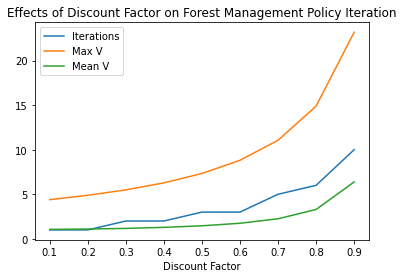

Converged in 10 iterations.
Running time: 0.0062181949615478516


In [20]:
# P: Transition probability matrices
# R: Reward matrices or vectors
# gamma: The per time-step discount factor on future rewards (0-1)
forestpi_gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
forestpi_gamma_iterations = []
forestpi_gamma_max_vs = []
forestpi_gamma_mean_vs = []
for g in forestpi_gammas:
    forest_gamma_pi = mdp.PolicyIteration(forest_P, forest_R, gamma=g, eval_type=1)
    forest_gamma_pi.run()
    final = forest_gamma_pi.run_stats[-1]
    forestpi_gamma_iterations.append(final["Iteration"])
    forestpi_gamma_max_vs.append(final["Max V"])
    forestpi_gamma_mean_vs.append(final["Mean V"])
    print(f"Optimal policy is: {forest_gamma_pi.policy}")
plt.figure()
plt.plot(forestpi_gammas, forestpi_gamma_iterations, label="Iterations")
plt.plot(forestpi_gammas, forestpi_gamma_max_vs, label="Max V")
plt.plot(forestpi_gammas, forestpi_gamma_mean_vs, label="Mean V")
plt.title(f"Effects of Discount Factor on Forest Management Policy Iteration")
plt.xlabel("Discount Factor")
plt.xticks(forestpi_gammas)
plt.legend(loc="best")
filename = f"forestpi_policy_iter.png"
plt.savefig(filename, bbox_inches="tight")
plt.show()

# How many iterations does it take to converge?
print(f"Converged in {forest_gamma_pi.iter} iterations.")
# CPU time to run
print(f"Running time: {forest_gamma_pi.time}")